# Student data-analysis

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
df = pd.read_csv('data/student_performance_data.csv')

As always, we need to get an overview of the data

In [147]:
for column in df.columns:
    print(column)
df.head(5)

StudentID
Age
Gender
Ethnicity
ParentalEducation
StudyTimeWeekly
Absences
Tutoring
ParentalSupport
Extracurricular
Sports
Music
Volunteering
GPA
GradeClass


StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3.042915         1.0  
2             0  0.112602         4.0  
3             0  2.054218         3.0  
4             0  1.288061         4.0

Now we have the ability to answer different questions via the data. Questions like:

Question 1: Is volunteering positively or negatively correlated with the GPA?                                           
Question 2: Do students, who feel like they have a great amount of parental support, study more?

Let's start with Question 1.

For question 1 there is a very handy method called ".corr" (corr for correlation). This method gives us a correlation between two columns, but does this in a very abstract way.

In [148]:
df['Volunteering'].corr(df['GPA'])

0.003257914066667164

Rather than using this abstract numerical value, we can go deeper into the data and look at potential correlations we want to explore

In [149]:
print("Number of students doing voluntary work:", len(df[df['Volunteering'] == 1]))
print("Number of students not doing voluntary work:", len(df[df['Volunteering'] == 0]))

Number of students doing voluntary work: 376
Number of students not doing voluntary work: 2016


In [150]:
df['GPA'].nunique()

2371

As we have seen with the heads method, the GPA is denoted with six decimal places. This makes it so that the GPA column has 2371 unique values. This is too much for a good analysis. Let's change that.

In [168]:
def rounding(num, rounder):
    return round(num, rounder)

gpa_list = [4, 3, 2, 1, 0]
def rounding_df(rounding_list, column_name):
    for rounder in rounding_list:
        rounded_series = df[column_name].apply(lambda gpa: rounding(gpa, rounder))
        df[f'{column_name}_{rounder}dp'] = rounded_series
        print(f"unique {column_name} values with {rounder} decimal points:", df[f'{column_name}_{rounder}dp'].nunique())
rounding_df(gpa_list, 'GPA')

unique GPA values with 4 decimal points: 1071
unique GPA values with 3 decimal points: 812
unique GPA values with 2 decimal points: 183
unique GPA values with 1 decimal points: 21
unique GPA values with 0 decimal points: 3


As we can see, rounding the GPA of the students shrinks the number of unique values. Because the number of unique GPAs with 2 decimal points (378) is so close to the number of students doing voluntary work (376), we will continue with the 2 decimal points GPA. 

Adding the 4 and 3 decimal point columns to the dataframe is not necessary, but will not hurt in a showcase like this either.

The next step is to work out a correlation between GPAs and volunteering work. For this, we should determine what great, good, average and bad GPAs are. This part is not a perfect science and more about what you specifically want to show with the data. Additionally, the results should not be advertised with vague ranges like "good" and "bad" but with the actual numerical values to minimize confusion. 

In [152]:
great_students = df[df['GPA_2dp'] >= 3.7]
good_students = df[(df['GPA_2dp'] >= 3.0) & (df['GPA_2dp'] < 3.70)]
avrg_students = df[(df['GPA_2dp'] >= 2.0) & (df['GPA_2dp'] < 3.0)]
bad_students = df[df['GPA_2dp'] > 2.0]

all_students = {"great students": great_students, "good students": good_students, "average students": avrg_students, "bad students": bad_students}

for name, df in all_students.items():
    print(f"Number of {name}: {len(df)}")

Number of great students: 29
Number of good students: 299
Number of average students: 793
Number of bad students: 1114


In [153]:
def percent_of_vol(df):
    vol = df[df['Volunteering'] == 1]
    return round((len(vol) * 100) / len(df), 2)

for name, df in all_students.items():
    percentage = percent_of_vol(df)
    print(f"Of all the {name}, {percentage}% do voluntary work.")

Of all the great students, 20.69% do voluntary work.
Of all the good students, 15.38% do voluntary work.
Of all the average students, 15.01% do voluntary work.
Of all the bad students, 15.26% do voluntary work.


Now we have an easily readable correlation between voluntary work and GPA of a student in the form of percentages, categorized by 4 different steps in the GPA (great, good, average, bad). If we wanted to show these findings to people outside of our work environment, we should change the 4 steps to actual, numerical ranges (great = above 3.7, good = between 3.0 and 3.7, average = between 2.0 and 3.0, bad = below 2.0). That way we minimize confusion and possible questions.

Let's resume with question 2: Do students, who feel like they have a great amount of parental support, study more?

For that, we need to, once again, go deeper into the data and look at what kind of values await us.

In [154]:
df['ParentalSupport'].corr(df['StudyTimeWeekly'])

0.031411330738422026

In [155]:
df['ParentalSupport'].value_counts()

ParentalSupport
3    357
2    336
1    205
4    141
0     75
Name: count, dtype: int64

In [156]:
df['StudyTimeWeekly'].value_counts()

StudyTimeWeekly
19.833723    1
11.987271    1
4.197857     1
5.028603     1
3.929653     1
            ..
1.265253     1
12.060277    1
13.386967    1
16.631479    1
17.819907    1
Name: count, Length: 1114, dtype: int64

Again, the time studied has way too many (6) decimal points. Luckily, we already wrote a function that takes care of rounding the values in a column and putting the rounded values in new columns.

In [157]:
study_time_list = [2, 1, 0]
rounding_df(study_time_list, 'StudyTimeWeekly')
df['StudyTimeWeekly_0dp'].max()

unique StudyTimeWeekly values with 2 decimal points: 852
unique StudyTimeWeekly values with 1 decimal points: 199
unique StudyTimeWeekly values with 0 decimal points: 21


20.0

To not repeat the same code for question 2 that we used for question 1, I'm going to do something different here. Instead of using percentages, we will use a kind of boxplot (a boxenplot in seaborn) to visualize the data. We can use the raw number of hours on the y-axis and the amount of support the students received from their parents on the x-axis, as they are coded into 5 steps (0-4).

In [158]:
ps_dict = {0: "None", 1: "Low", 2: "Medium", 3: "High", 4: "Very High"}
df['ParentalSupportABC'] = df['ParentalSupport']
for num, word in ps_dict.items():
    df['ParentalSupportABC'] = df['ParentalSupportABC'].replace(num, word)

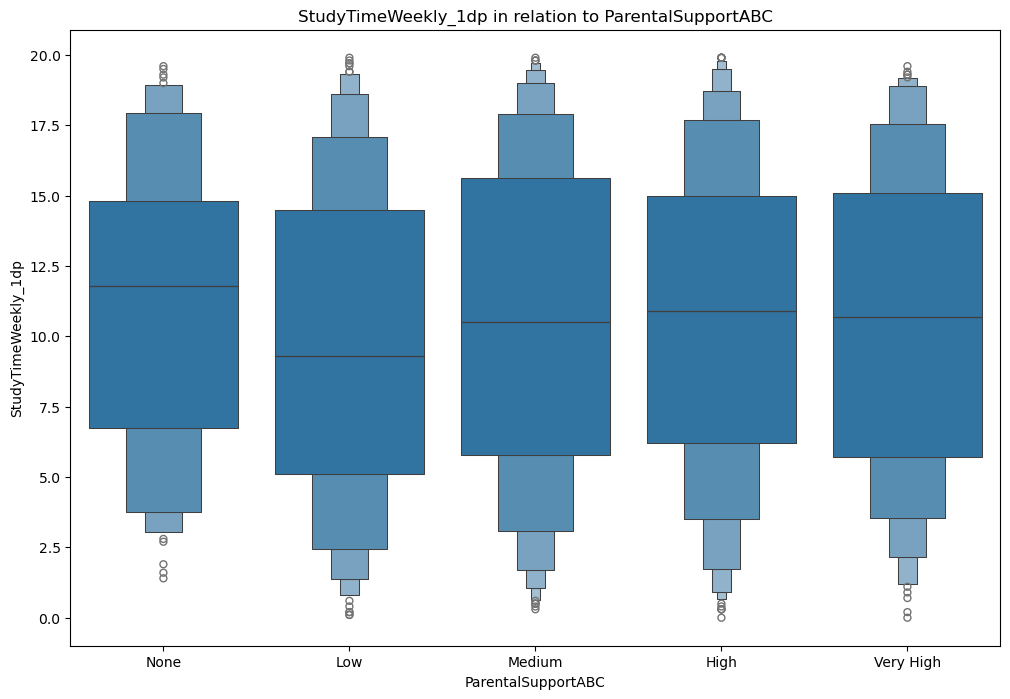

In [163]:
def boxenplot_relation(x, y, order):
    plt.figure(figsize=(12, 8))
    sns.boxenplot(x=x, y=y, data=df, order=order)
    
    plt.xlabel(f'{x}')
    plt.ylabel(f'{y}')
    plt.title(f'{y} in relation to {x}')
    plt.show()
parental_support_order = ['None', 'Low', 'Medium', 'High', 'Very High']
boxenplot_relation(x='ParentalSupportABC', y='StudyTimeWeekly_1dp', order=parental_support_order)

In this example we can see, that the time a student studies does not continually increase with the parental support they receive. Neither is it related meaningfully in any way we can observe. 

We can, however, look at other columns and their relation. For example GPA and study time. For that, we only need to get a list of the GPAs for the order, that is sorted and has only unique values. After that we can use our boxenplot_relation function to plot.

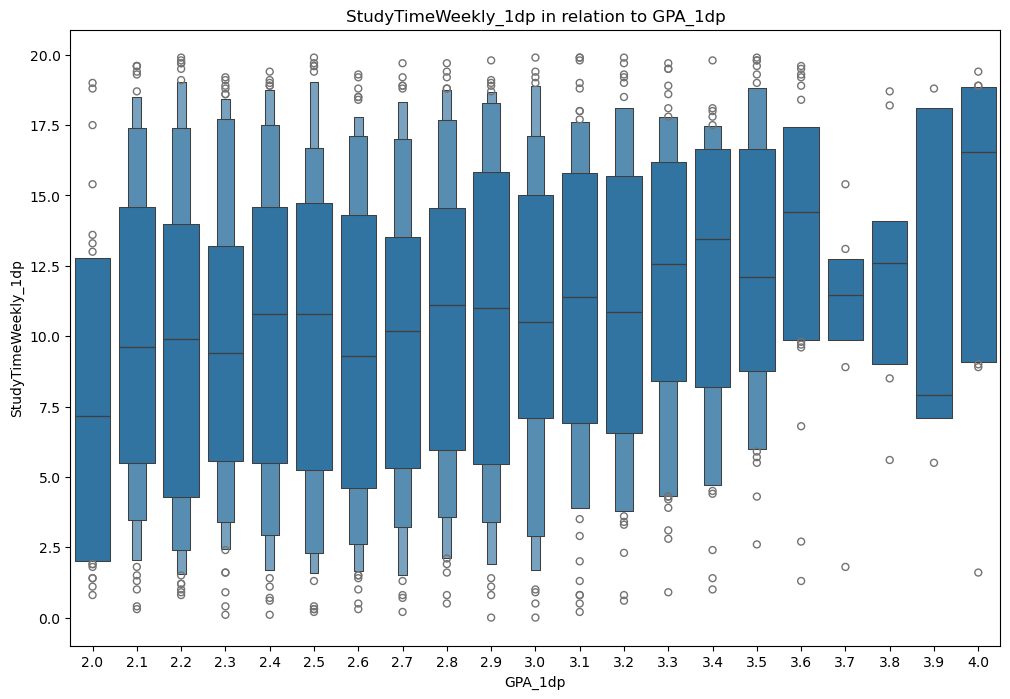

In [172]:
gpa_order = df['GPA_1dp'].tolist()
gpa_order.sort()
gpa_order = list(dict.fromkeys(gpa_order))
boxenplot_relation(x='GPA_1dp', y='StudyTimeWeekly_1dp', order=gpa_order)

Although there are ups and downs, the general direction is clear. People with a higher GPA have a higher study time on average. The 3.7 and 3.8 GPAs can be overlooked due to the low amount of students having exactly these two GPAs.   